C:\Users\carlo\AppData\Local\Temp\ipykernel_2500\2396777737.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


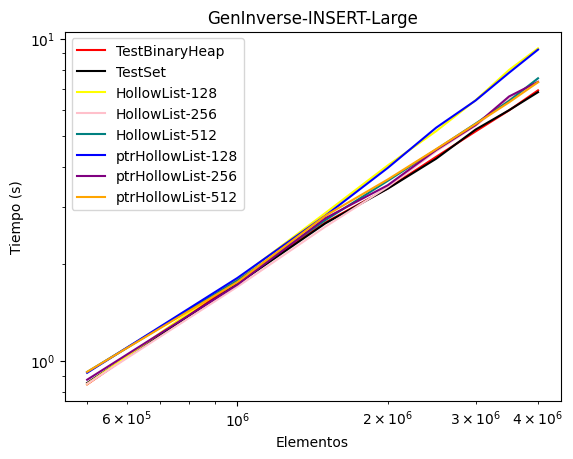

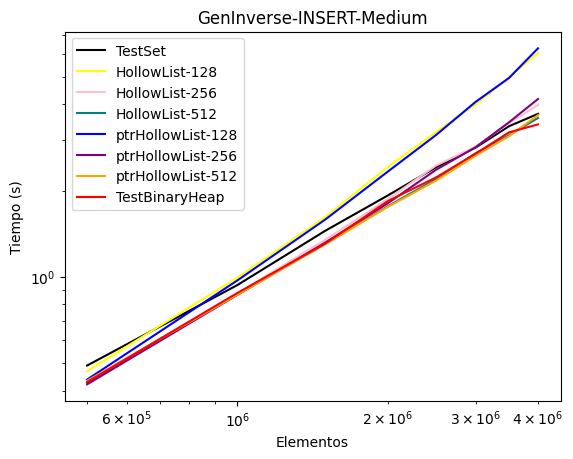

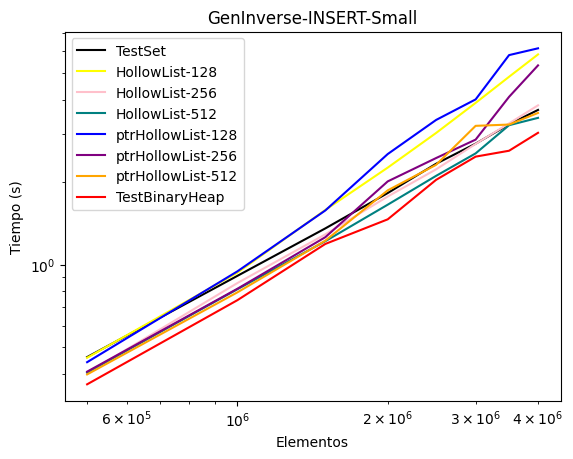

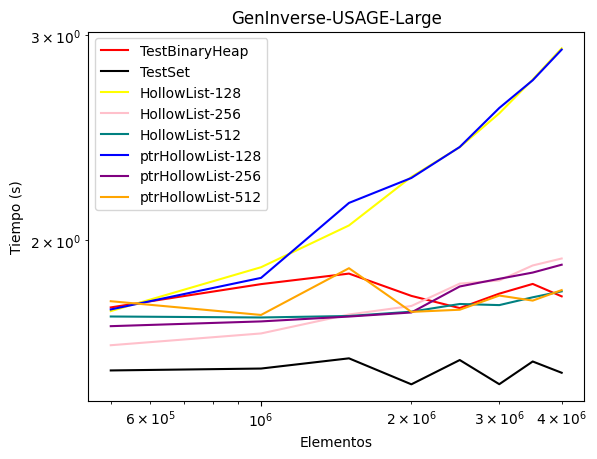

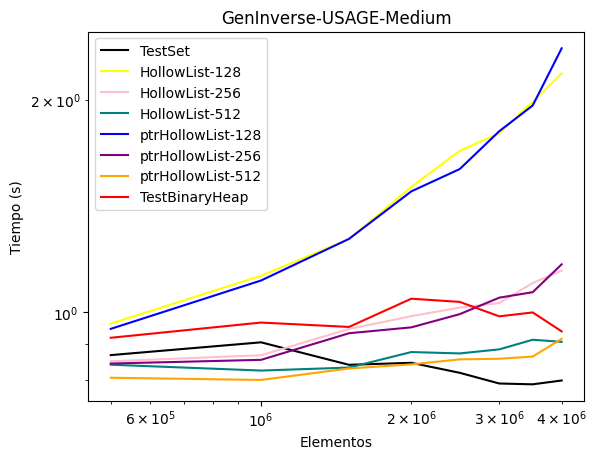

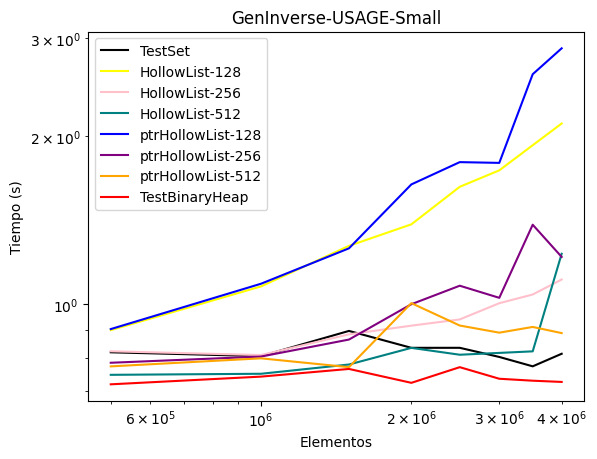

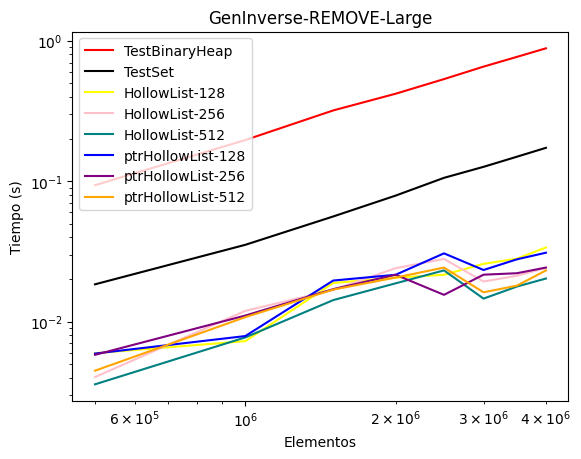

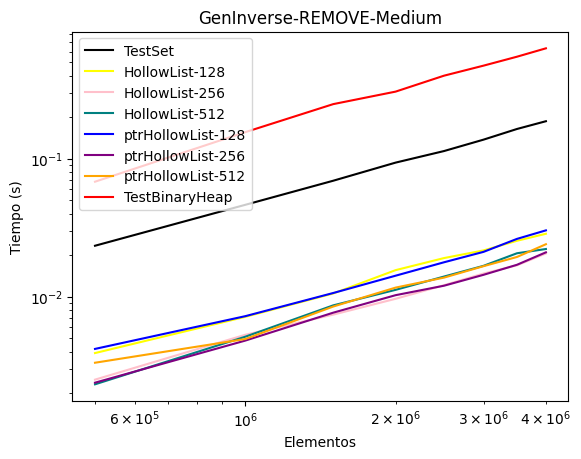

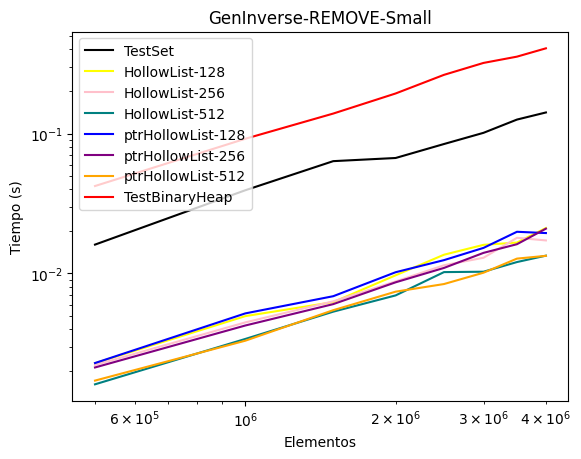

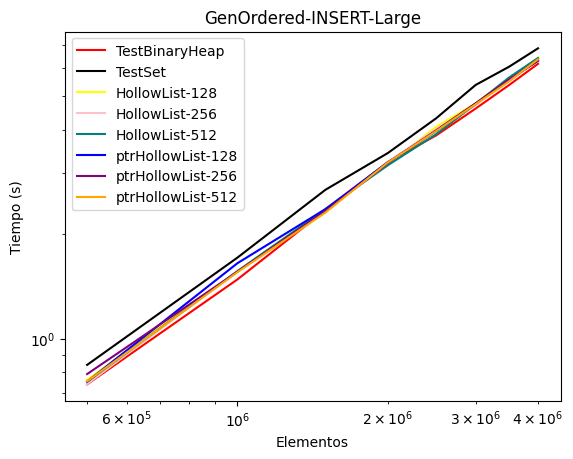

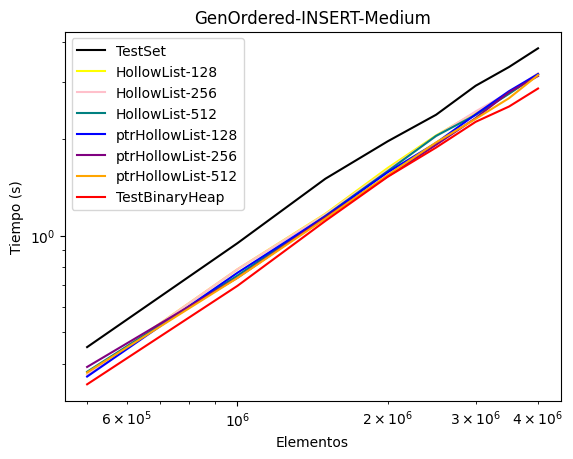

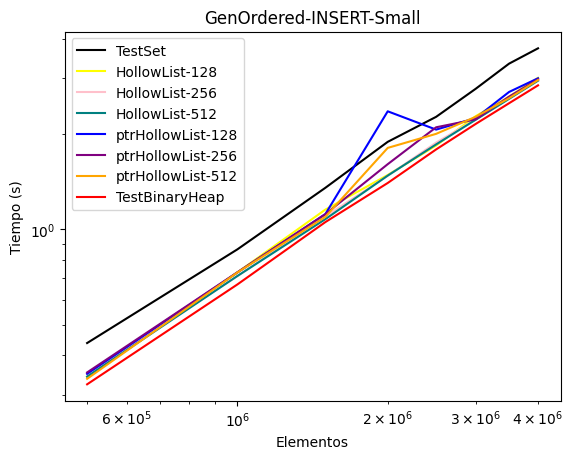

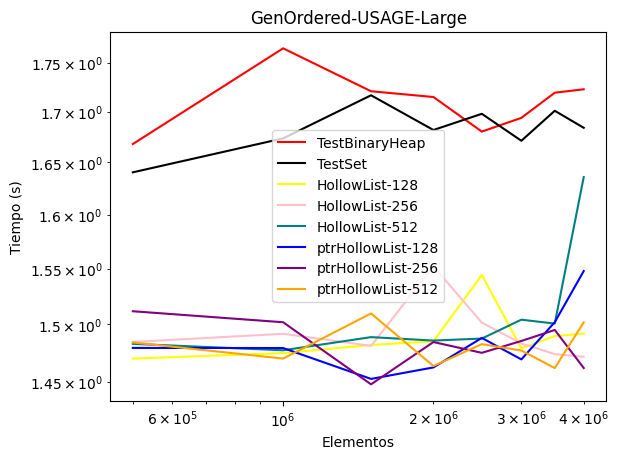

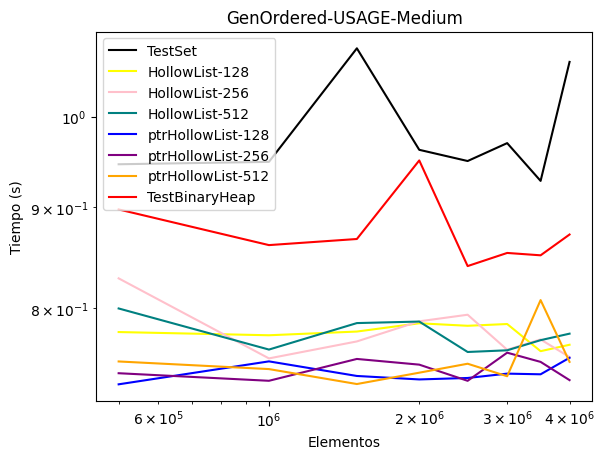

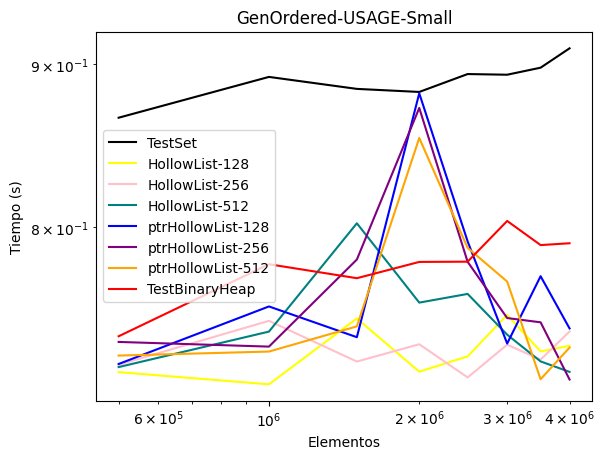

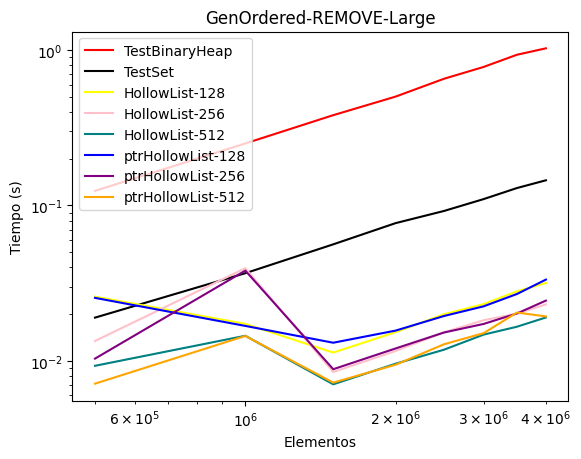

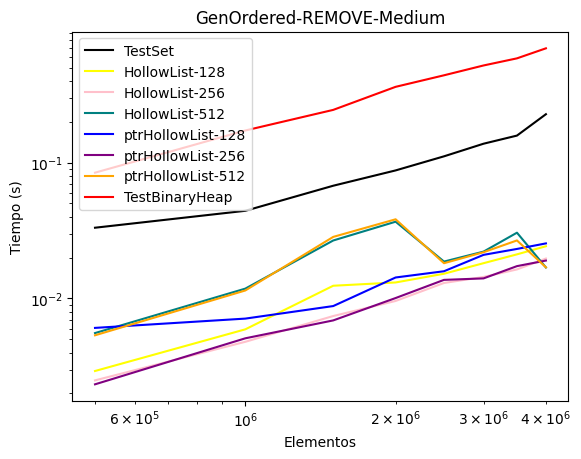

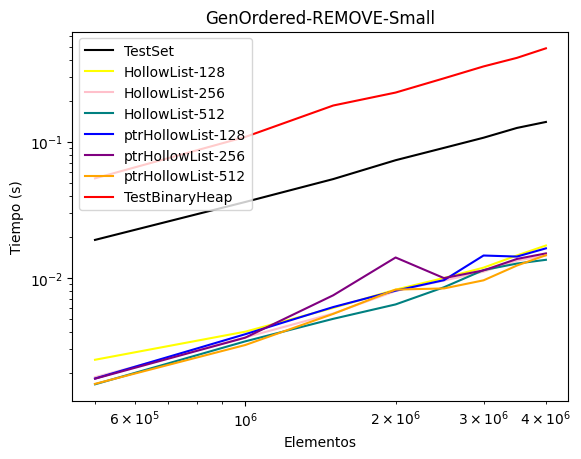

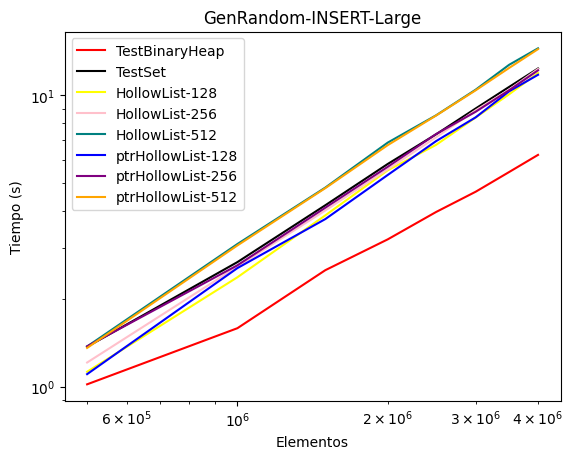

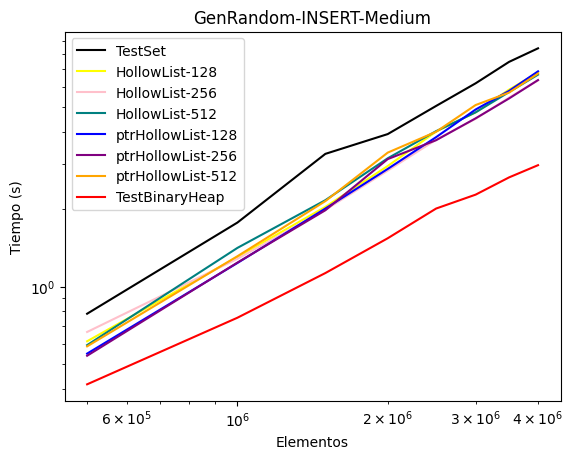

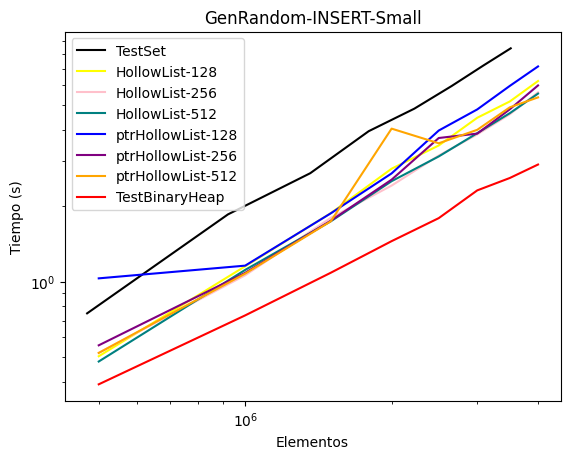

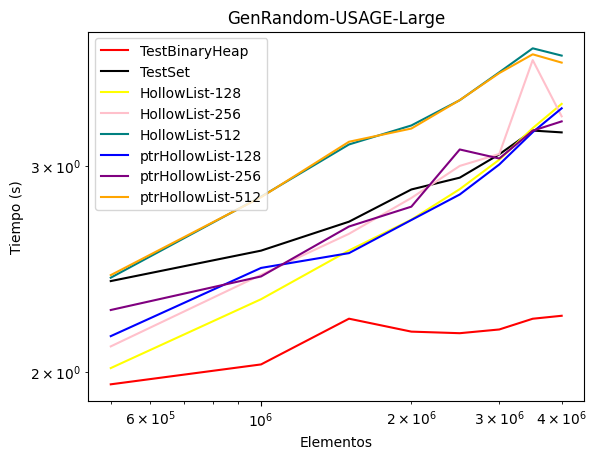

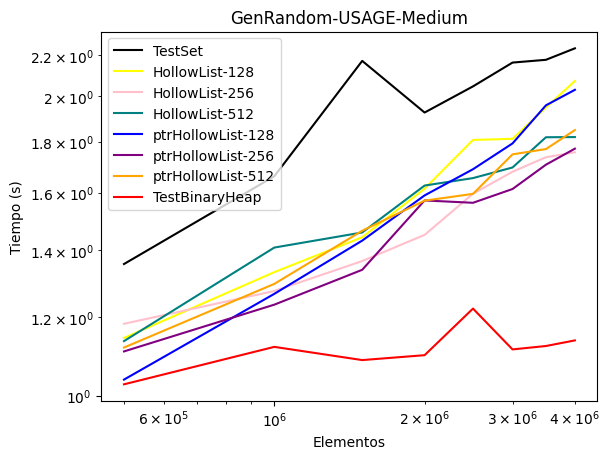

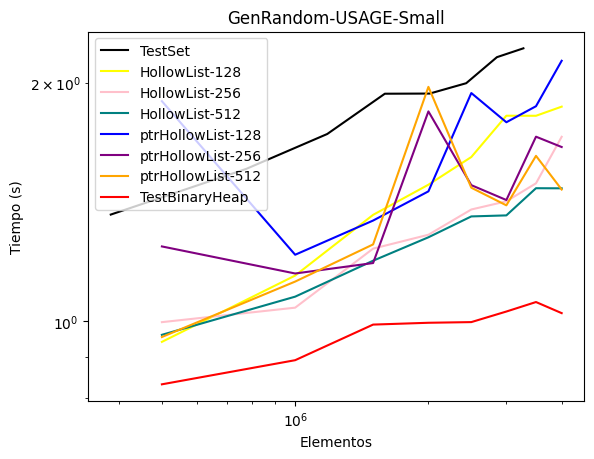

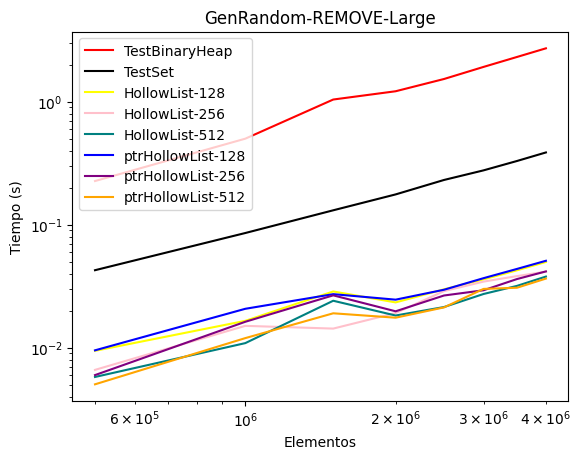

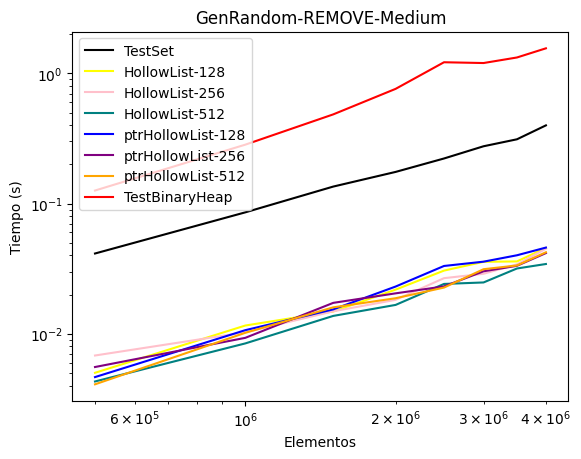

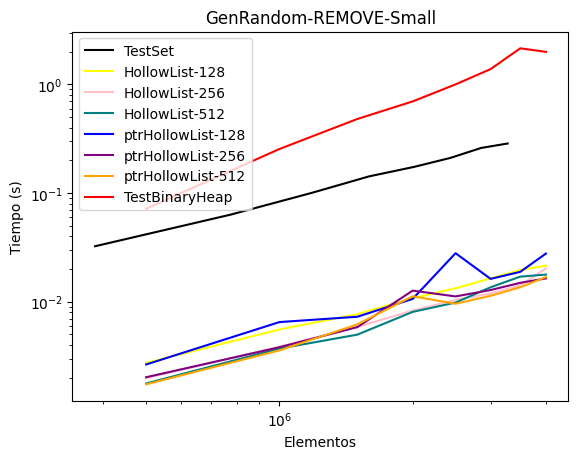

In [2]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

colores = {"TestBinaryHeap": "red",  "ptrHollowList-128": "blue",
"ptrHollowList-256": "purple", "ptrHollowList-512": "orange",  "HollowList-128": "yellow", "HollowList-256": "pink", "HollowList-512": "teal",
"TestSet": "black", "TestVector": "maroon"}
contenido = os.listdir('./CSV/')
for archivo in contenido:
    # archivo termina en .csv y no es sys.csv
    if archivo.endswith(".csv") and archivo != "sys.csv":
        df = pd.read_csv('./CSV/'+archivo)
        for test in df.TEST.unique():
            test_df=df[df.TEST==test]
            for type in test_df.TYPE.unique():
                fig, ax = plt.subplots()
                type_df = test_df[test_df.TYPE == type]
                for program in type_df.PROGRAM.unique():
                    program_df = type_df[type_df.PROGRAM == program]
                    sizes = program_df.SIZE.values
                    times = program_df.TIME.values
                    ax.plot(sizes, times, label=program, color=colores[program])
                ax.legend()
                ax.set_title(f"{Path(archivo).stem}-{test}-{type}")
                plt.xscale('log')
                plt.yscale('log')
                plt.xlabel('Elementos')
                plt.ylabel('Tiempo (s)')
                filename = "figure_{}-{}-{}.svg".format(Path(archivo).stem, type,test)
                plt.savefig(filename, format="svg")
    

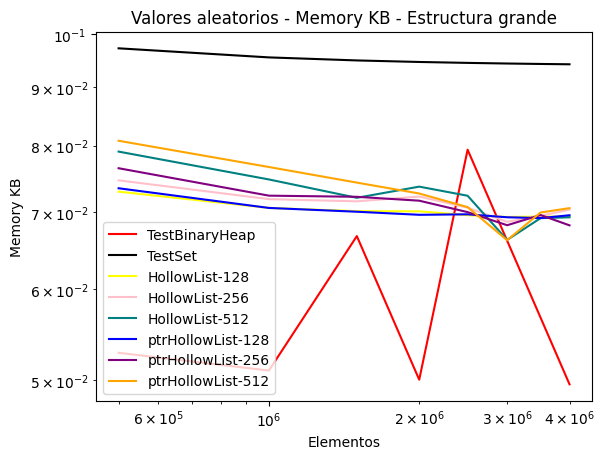

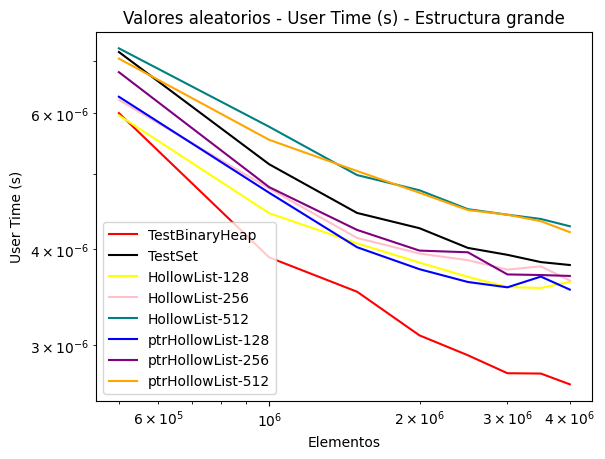

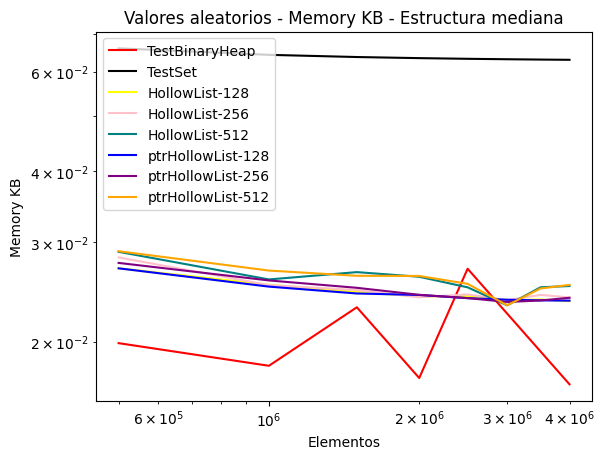

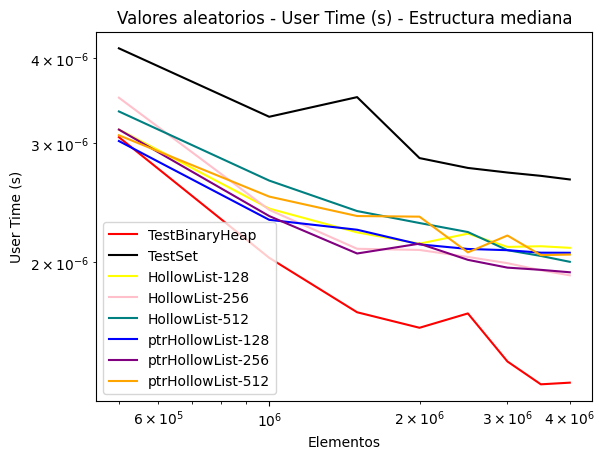

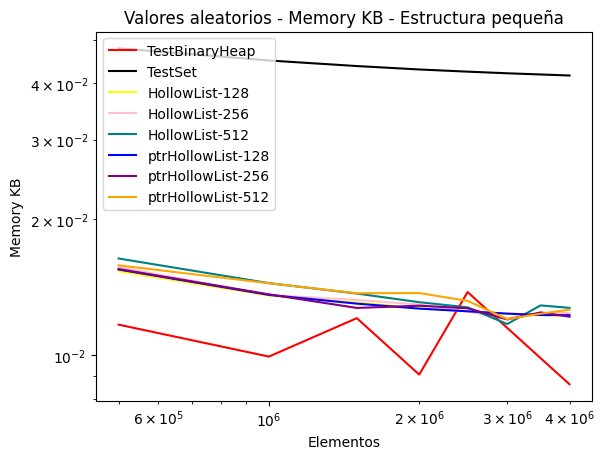

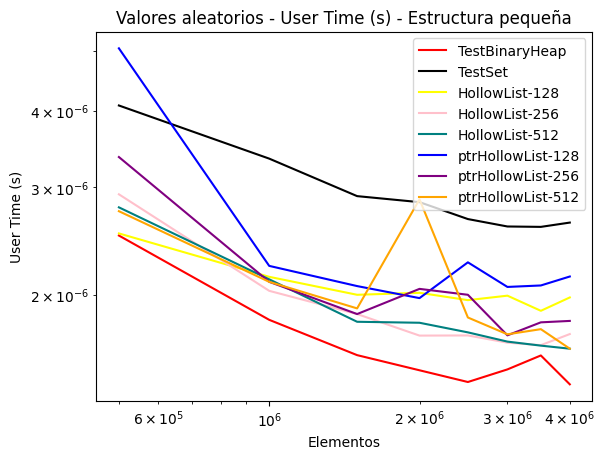

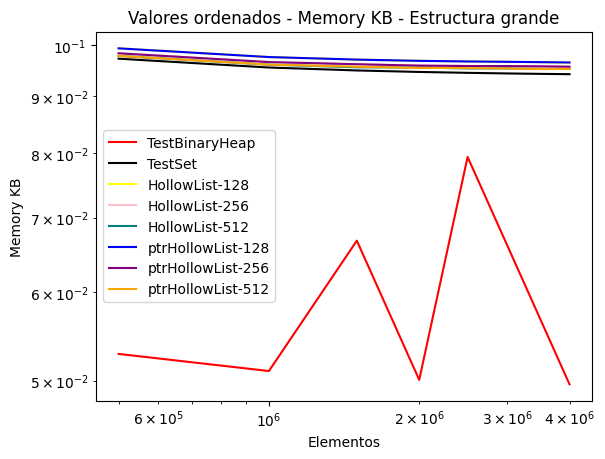

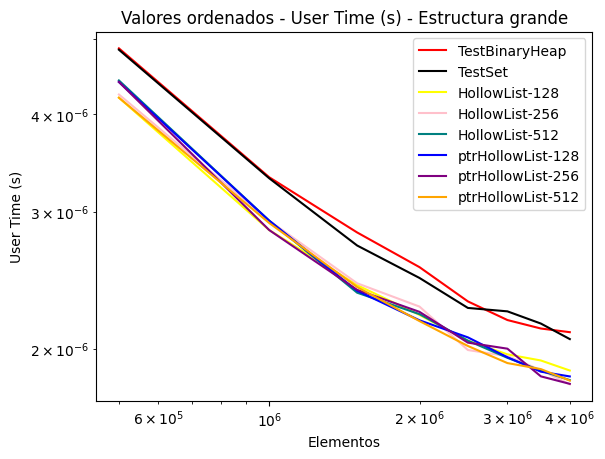

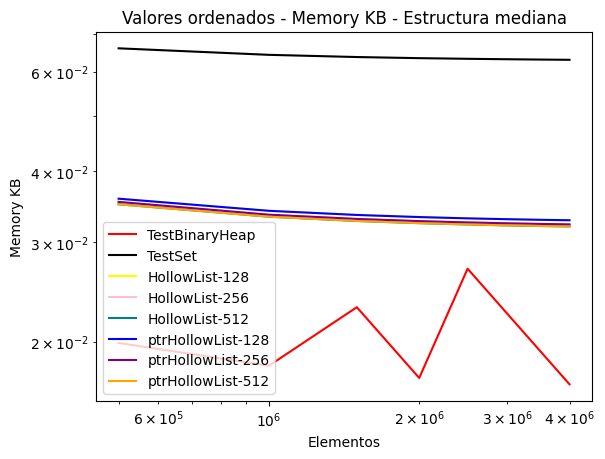

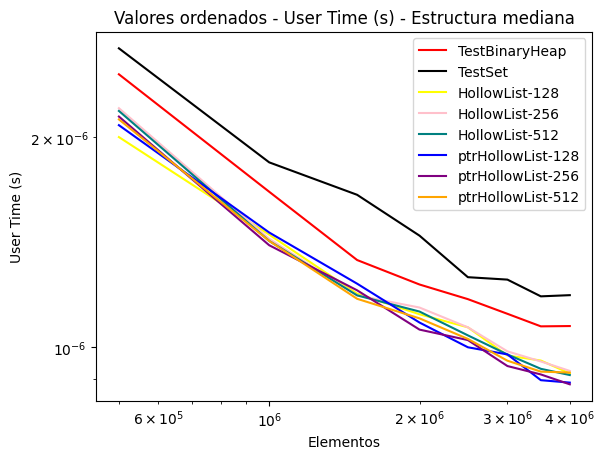

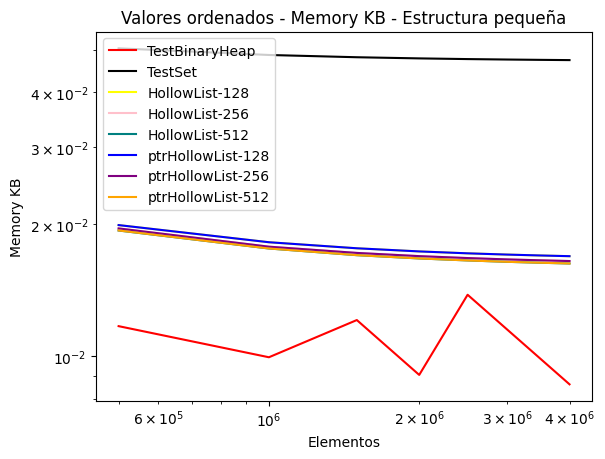

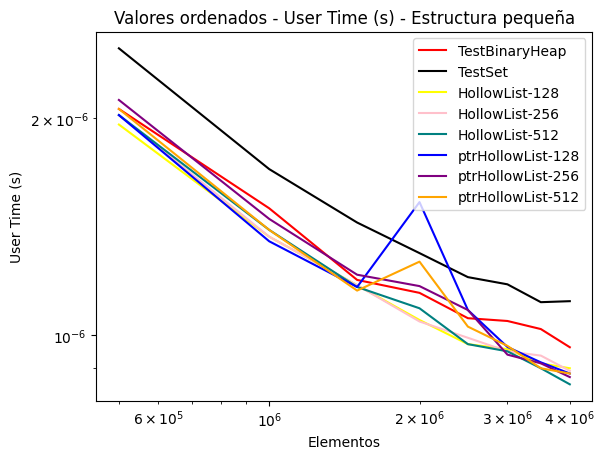

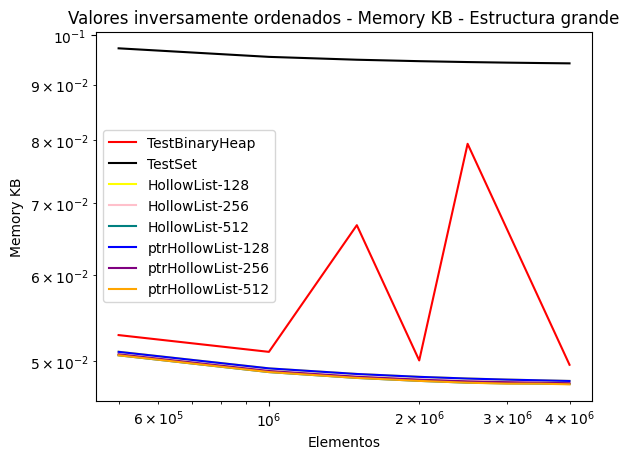

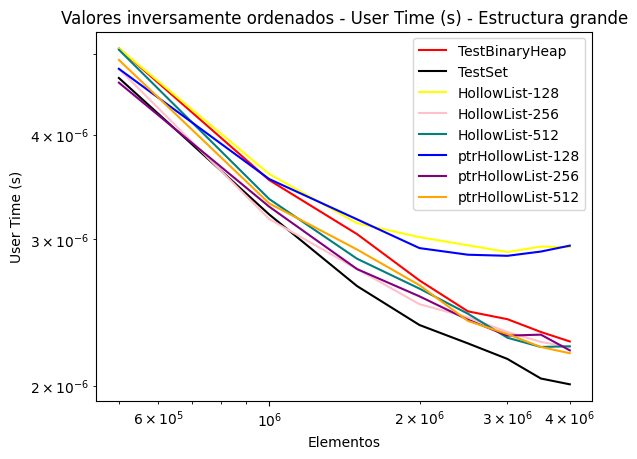

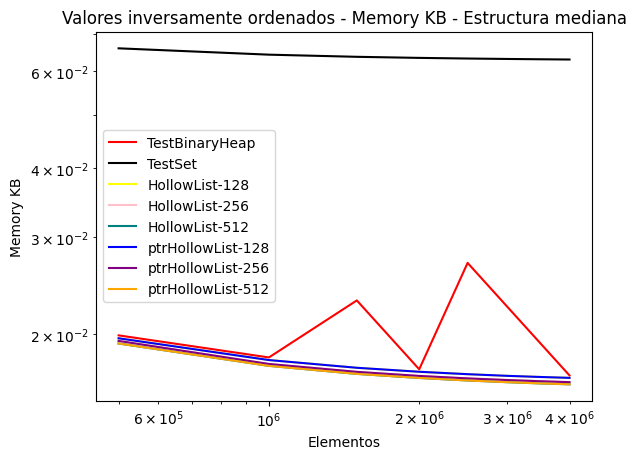

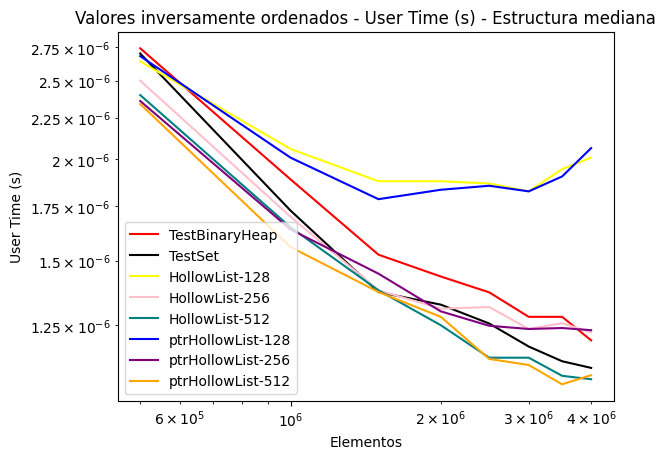

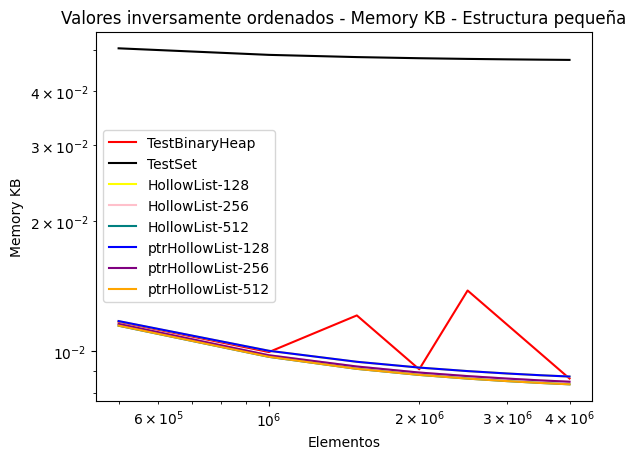

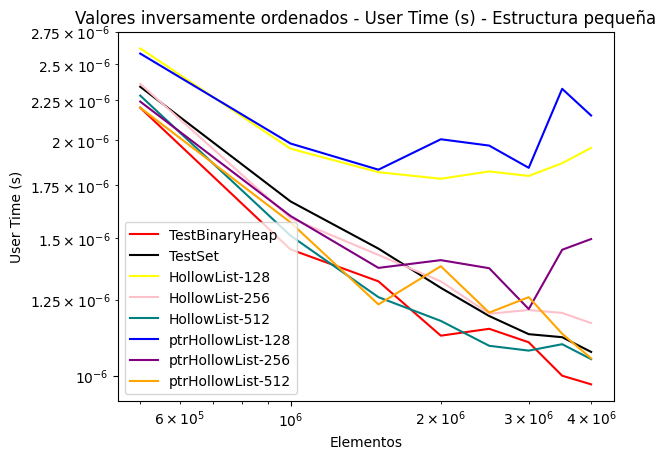

In [3]:
df = pd.read_csv('./CSV/sys.csv')
tests = {"GenRandom": "Valores aleatorios", "GenOrdered": "Valores ordenados", "GenInverse": "Valores inversamente ordenados"}
tipos = {0: "Estructura pequeña", 1: "Estructura mediana", 2: "Estructura grande"}

colores = {"TestBinaryHeap": "red", "ptrHollowList-64": "green", "ptrHollowList-128": "blue",
"ptrHollowList-256": "purple", "ptrHollowList-512": "orange", "ptrHollowList-1024": "gray",
"ptrHollowList-2048": "brown", "HollowList-32": "cyan", "HollowList-64": "magenta",
"HollowList-128": "yellow", "HollowList-256": "pink", "HollowList-512": "teal",
"HollowList-1024": "violet", "HollowList-2048": "olive", "TestSet": "black",
"TestVector": "maroon"}

def graph(x, y, label, test, tipo, test_df):
    fig, ax = plt.subplots()
    for program in test_df.PROGRAM.unique():
        sizes = x[(test_df.PROGRAM == program) & (test_df.TEST == test) & (test_df.TYPE == tipo)]
        times = y[(test_df.PROGRAM == program) & (test_df.TEST == test) & (test_df.TYPE == tipo)]/sizes
        tipo_label = tipos[tipo]
        p_label = f"{program}"
        color = colores[program]
        ax.plot(sizes, times, label=p_label, color=color)
    ax.legend()
    ax.set_title(f"{tests[test]} - {label} - {tipo_label}")
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Elementos')
    plt.ylabel(label)

for test in df.TEST.unique():
    test_df = df[df.TEST == test]
    for tipo in test_df.TYPE.unique():
        graph(test_df.SIZE.values, test_df.MEM.values, 'Memory KB', test, tipo, test_df)
        # graph(test_df.SIZE.values, test_df.SYS_TIME.values, 'System Time (s)', test, tipo, test_df)
        graph(test_df.SIZE.values, test_df.USER_TIME.values, 'User Time (s)', test, tipo, test_df)
        # graph(test_df.SIZE.values, test_df.PAGE_FAULTS.values, 'Page Faults', test, tipo, test_df)
